# API Football v3 di API-Sports Explorer
En las primeras 4 secciones de este notebook se muestran los principales endpoints de la API de datos de fútbol de API-Sports. En particular, se presentan ejemplos de uso para los siguientes endpoints:

* /countries
* /leagues
* /teams
* /fixtures

Para cada endpoint también se muestra un posible uso de los filtros disponibles para realizar una búsqueda más específica.

En la sección 5 se han creado visualizaciones de ejemplo basadas en los endpoints descritos anteriormente. Para facilitar el uso de estas visualizaciones, se ha creado una aplicación web en Streamlit que se puede visitar en este enlace.




In [4]:
# Import librerie
import requests
import pandas as pd
import plotly.express as px
from dotenv import load_dotenv
import os

load_dotenv()

# Configurazione API
API_BASE = "https://v3.football.api-sports.io"
API_KEY = os.getenv("API_SPORTS_FOOTBALL")

headers = {
    "x-apisports-key": API_KEY,
    "x-rapidapi-host": "v3.football.api-sports.io"
}

def api_get(endpoint, params=None):
    resp = requests.get(f"{API_BASE}{endpoint}", headers=headers, params=params)
    resp.raise_for_status()
    print(resp.text)
    return resp.json().get("response", [])


## 1. Países
Endpoint: `GET /countries?search=Spain`

In [5]:
# Countries - Listar todos los países disponibles a través de la API.
countries = api_get("/countries",) # 
df_countries = pd.json_normalize(countries)
df_countries

{"get":"countries","parameters":[],"errors":[],"results":171,"paging":{"current":1,"total":1},"response":[{"name":"Albania","code":"AL","flag":"https:\/\/media.api-sports.io\/flags\/al.svg"},{"name":"Algeria","code":"DZ","flag":"https:\/\/media.api-sports.io\/flags\/dz.svg"},{"name":"Andorra","code":"AD","flag":"https:\/\/media.api-sports.io\/flags\/ad.svg"},{"name":"Angola","code":"AO","flag":"https:\/\/media.api-sports.io\/flags\/ao.svg"},{"name":"Antigua-And-Barbuda","code":"AG","flag":"https:\/\/media.api-sports.io\/flags\/ag.svg"},{"name":"Argentina","code":"AR","flag":"https:\/\/media.api-sports.io\/flags\/ar.svg"},{"name":"Armenia","code":"AM","flag":"https:\/\/media.api-sports.io\/flags\/am.svg"},{"name":"Aruba","code":"AW","flag":"https:\/\/media.api-sports.io\/flags\/aw.svg"},{"name":"Australia","code":"AU","flag":"https:\/\/media.api-sports.io\/flags\/au.svg"},{"name":"Austria","code":"AT","flag":"https:\/\/media.api-sports.io\/flags\/at.svg"},{"name":"Azerbaijan","code":"AZ

,name,code,flag
0,Albania,AL,https://media.api-sports.io/flags/al.svg
1,Algeria,DZ,https://media.api-sports.io/flags/dz.svg
2,Andorra,AD,https://media.api-sports.io/flags/ad.svg
3,Angola,AO,https://media.api-sports.io/flags/ao.svg
4,Antigua-And-Barbuda,AG,https://media.api-sports.io/flags/ag.svg
...,...,...,...
166,Wales,GB-WLS,https://media.api-sports.io/flags/gb-wls.svg
167,World,None,None
168,Yemen,YE,https://media.api-sports.io/flags/ye.svg
169,Zambia,ZM,https://media.api-sports.io/flags/zm.svg


In [6]:
#Usar el código o el nombre como filtros
#El código y el campo de búsqueda son alternativas
countries = api_get("/countries",
                    {
                        "search" : "Spain",
                        "code":"ES"
                    }) 
df_countries = pd.json_normalize(countries)


{"get":"countries","parameters":{"search":"Spain","code":"ES"},"errors":[],"results":1,"paging":{"current":1,"total":1},"response":[{"name":"Spain","code":"ES","flag":"https:\/\/media.api-sports.io\/flags\/es.svg"}]}


In [7]:
df_countries

,name,code,flag
0,Spain,ES,https://media.api-sports.io/flags/es.svg


## 2. Ligas
Chiamata: `GET /leagues?country=<country_name>&season={season_year}`

In [8]:
# Ligas
leagues = api_get("/leagues", {"country": "Spain"})
df_leagues = pd.json_normalize(leagues)
# display(df_leagues[["league.id", "league.name", "country"]])


{"get":"leagues","parameters":{"country":"Spain"},"errors":[],"results":38,"paging":{"current":1,"total":1},"response":[{"league":{"id":140,"name":"La Liga","type":"League","logo":"https:\/\/media.api-sports.io\/football\/leagues\/140.png"},"country":{"name":"Spain","code":"ES","flag":"https:\/\/media.api-sports.io\/flags\/es.svg"},"seasons":[{"year":2010,"start":"2010-08-28","end":"2011-05-21","current":false,"coverage":{"fixtures":{"events":true,"lineups":true,"statistics_fixtures":false,"statistics_players":false},"standings":true,"players":true,"top_scorers":true,"top_assists":true,"top_cards":true,"injuries":false,"predictions":true,"odds":false}},{"year":2011,"start":"2011-08-27","end":"2012-05-13","current":false,"coverage":{"fixtures":{"events":true,"lineups":true,"statistics_fixtures":false,"statistics_players":false},"standings":true,"players":true,"top_scorers":true,"top_assists":true,"top_cards":true,"injuries":false,"predictions":true,"odds":false}},{"year":2012,"start":"2

In [9]:
df_leagues.columns

Index(['seasons', 'league.id', 'league.name', 'league.type', 'league.logo',
       'country.name', 'country.code', 'country.flag'],
      dtype='object')

In [10]:
df_leagues

,seasons,league.id,league.name,league.type,league.logo,country.name,country.code,country.flag
0,"[{'year': 2010, 'start': '2010-08-28', 'end': ...",140,La Liga,League,https://media.api-sports.io/football/leagues/1...,Spain,ES,https://media.api-sports.io/flags/es.svg
1,"[{'year': 2016, 'start': '2016-08-19', 'end': ...",141,Segunda División,League,https://media.api-sports.io/football/leagues/1...,Spain,ES,https://media.api-sports.io/flags/es.svg
2,"[{'year': 2016, 'start': '2016-09-03', 'end': ...",142,Primera División Femenina,League,https://media.api-sports.io/football/leagues/1...,Spain,ES,https://media.api-sports.io/flags/es.svg
3,"[{'year': 2016, 'start': '2016-08-14', 'end': ...",556,Super Cup,Cup,https://media.api-sports.io/football/leagues/5...,Spain,ES,https://media.api-sports.io/flags/es.svg
4,"[{'year': 2018, 'start': '2018-09-05', 'end': ...",143,Copa del Rey,Cup,https://media.api-sports.io/football/leagues/1...,Spain,ES,https://media.api-sports.io/flags/es.svg
5,"[{'year': 2019, 'start': '2019-08-24', 'end': ...",435,Primera División RFEF - Group 1,League,https://media.api-sports.io/football/leagues/4...,Spain,ES,https://media.api-sports.io/flags/es.svg
6,"[{'year': 2019, 'start': '2019-08-24', 'end': ...",436,Primera División RFEF - Group 2,League,https://media.api-sports.io/football/leagues/4...,Spain,ES,https://media.api-sports.io/flags/es.svg
7,"[{'year': 2019, 'start': '2019-08-24', 'end': ...",437,Primera División RFEF - Group 3,League,https://media.api-sports.io/football/leagues/4...,Spain,ES,https://media.api-sports.io/flags/es.svg
8,"[{'year': 2019, 'start': '2019-08-24', 'end': ...",438,Primera División RFEF - Group 4,League,https://media.api-sports.io/football/leagues/4...,Spain,ES,https://media.api-sports.io/flags/es.svg
9,"[{'year': 2019, 'start': '2019-08-24', 'end': ...",439,Tercera División RFEF - Group 1,League,https://media.api-sports.io/football/leagues/4...,Spain,ES,https://media.api-sports.io/flags/es.svg


In [11]:
df_leagues['seasons'][0][:2]

[{'year': 2010,
  'start': '2010-08-28',
  'end': '2011-05-21',
  'current': False,
  'coverage': {'fixtures': {'events': True,
    'lineups': True,
    'statistics_fixtures': False,
    'statistics_players': False},
   'standings': True,
   'players': True,
   'top_scorers': True,
   'top_assists': True,
   'top_cards': True,
   'injuries': False,
   'predictions': True,
   'odds': False}},
 {'year': 2011,
  'start': '2011-08-27',
  'end': '2012-05-13',
  'current': False,
  'coverage': {'fixtures': {'events': True,
    'lineups': True,
    'statistics_fixtures': False,
    'statistics_players': False},
   'standings': True,
   'players': True,
   'top_scorers': True,
   'top_assists': True,
   'top_cards': True,
   'injuries': False,
   'predictions': True,
   'odds': False}}]

In [12]:
pd.json_normalize(df_leagues['seasons'][0]).sort_values(by='year', ascending=False)

,year,start,end,current,coverage.fixtures.events,coverage.fixtures.lineups,coverage.fixtures.statistics_fixtures,coverage.fixtures.statistics_players,coverage.standings,coverage.players,coverage.top_scorers,coverage.top_assists,coverage.top_cards,coverage.injuries,coverage.predictions,coverage.odds
15,2025,2025-08-17,2026-05-24,True,False,False,False,False,True,False,False,False,False,False,True,False
14,2024,2024-08-15,2025-05-25,False,True,True,True,True,True,True,True,True,True,True,True,False
13,2023,2023-08-11,2024-05-26,False,True,True,True,True,True,True,True,True,True,True,True,False
12,2022,2022-08-12,2023-06-04,False,True,True,True,True,True,True,True,True,True,True,True,False
11,2021,2021-08-13,2022-05-22,False,True,True,True,True,True,True,True,True,True,True,True,False
10,2020,2020-09-12,2021-05-23,False,True,True,True,True,True,True,True,True,True,True,True,False
9,2019,2019-08-16,2020-07-19,False,True,True,True,True,True,True,True,True,True,False,True,False
8,2018,2018-08-17,2019-05-19,False,True,True,True,True,True,True,True,True,True,False,True,False
7,2017,2017-08-18,2018-05-20,False,True,True,True,True,True,True,True,True,True,False,True,False
6,2016,2016-08-19,2017-05-21,False,True,True,True,True,True,True,True,True,True,False,True,False


## 3. Equipos
Endpoint: `GET /teams?league=<competition_id>&season=<season_id>`

In [13]:
# Equipos in La Liga 2024
laliga = df_leagues[df_leagues["league.name"] == "La Liga"]["league.id"].iloc[0]
teams = api_get("/teams", {"league":"140","season":"2023"})
df_teams = pd.json_normalize(teams)

{"get":"teams","parameters":{"league":"140","season":"2023"},"errors":[],"results":20,"paging":{"current":1,"total":1},"response":[{"team":{"id":529,"name":"Barcelona","code":"BAR","country":"Spain","founded":1899,"national":false,"logo":"https:\/\/media.api-sports.io\/football\/teams\/529.png"},"venue":{"id":19939,"name":"Estadi Ol\u00edmpic Llu\u00eds Companys","address":"Carrer de l&apos;Estadi","city":"Barcelona","capacity":55926,"surface":"grass","image":"https:\/\/media.api-sports.io\/football\/venues\/19939.png"}},{"team":{"id":530,"name":"Atletico Madrid","code":"MAD","country":"Spain","founded":1903,"national":false,"logo":"https:\/\/media.api-sports.io\/football\/teams\/530.png"},"venue":{"id":19217,"name":"Est\u00e1dio C\u00edvitas Metropolitano","address":"Rosas","city":"Madrid","capacity":70460,"surface":"grass","image":"https:\/\/media.api-sports.io\/football\/venues\/19217.png"}},{"team":{"id":531,"name":"Athletic Club","code":"BIL","country":"Spain","founded":1898,"nati

In [14]:
df_teams

,team.id,team.name,team.code,team.country,team.founded,team.national,team.logo,venue.id,venue.name,venue.address,venue.city,venue.capacity,venue.surface,venue.image
0,529,Barcelona,BAR,Spain,1899,False,https://media.api-sports.io/football/teams/529...,19939,Estadi Olímpic Lluís Companys,Carrer de l&apos;Estadi,Barcelona,55926,grass,https://media.api-sports.io/football/venues/19...
1,530,Atletico Madrid,MAD,Spain,1903,False,https://media.api-sports.io/football/teams/530...,19217,Estádio Cívitas Metropolitano,Rosas,Madrid,70460,grass,https://media.api-sports.io/football/venues/19...
2,531,Athletic Club,BIL,Spain,1898,False,https://media.api-sports.io/football/teams/531...,1460,San Mamés Barria,Rafael Moreno Pitxitxi Kalea,Bilbao,53289,grass,https://media.api-sports.io/football/venues/14...
3,532,Valencia,VAL,Spain,1919,False,https://media.api-sports.io/football/teams/532...,1497,Estadio de Mestalla,Avenida de Suecia,Valencia,55000,grass,https://media.api-sports.io/football/venues/14...
4,533,Villarreal,VIL,Spain,1923,False,https://media.api-sports.io/football/teams/533...,1498,Estadio de la Cerámica,Plaza Labrador,Villarreal,24500,grass,https://media.api-sports.io/football/venues/14...
5,534,Las Palmas,PAL,Spain,1949,False,https://media.api-sports.io/football/teams/534...,1481,Estadio de Gran Canaria,Avenida Pío XII 29,Las Palmas de Gran Canaria,32392,grass,https://media.api-sports.io/football/venues/14...
6,536,Sevilla,SEV,Spain,1890,False,https://media.api-sports.io/football/teams/536...,1494,Estadio Ramón Sánchez Pizjuán,Avenida de Eduardo Dato,Sevilla,48649,grass,https://media.api-sports.io/football/venues/14...
7,538,Celta Vigo,CEL,Spain,1923,False,https://media.api-sports.io/football/teams/538...,1467,Abanca-Balaídos,Avenida de Balaídos,Vigo,31800,grass,https://media.api-sports.io/football/venues/14...
8,541,Real Madrid,REA,Spain,1902,False,https://media.api-sports.io/football/teams/541...,1456,Estadio Santiago Bernabéu,"Avenida de Concha Espina 1, Chamartín",Madrid,85454,grass,https://media.api-sports.io/football/venues/14...
9,542,Alaves,ALA,Spain,1921,False,https://media.api-sports.io/football/teams/542...,1470,Estadio de Mendizorroza,Paseo de Cervantes,Vitoria-Gasteiz,19840,grass,https://media.api-sports.io/football/venues/14...


## 4. Partidos
Endpoint: `GET /fixtures?league=<league_id>&season={season_year}&from=<YYYY-MM-DD>&to=<YYYY-MM-DD>`

In [15]:
laliga = df_leagues.loc[df_leagues['league.name']=='La Liga'].iloc[0]
laliga_seasons = pd.DataFrame(laliga['seasons'])
laliga_seasons.sort_values('year', ascending = False)

,year,start,end,current,coverage
15,2025,2025-08-17,2026-05-24,True,"{'fixtures': {'events': False, 'lineups': Fals..."
14,2024,2024-08-15,2025-05-25,False,"{'fixtures': {'events': True, 'lineups': True,..."
13,2023,2023-08-11,2024-05-26,False,"{'fixtures': {'events': True, 'lineups': True,..."
12,2022,2022-08-12,2023-06-04,False,"{'fixtures': {'events': True, 'lineups': True,..."
11,2021,2021-08-13,2022-05-22,False,"{'fixtures': {'events': True, 'lineups': True,..."
10,2020,2020-09-12,2021-05-23,False,"{'fixtures': {'events': True, 'lineups': True,..."
9,2019,2019-08-16,2020-07-19,False,"{'fixtures': {'events': True, 'lineups': True,..."
8,2018,2018-08-17,2019-05-19,False,"{'fixtures': {'events': True, 'lineups': True,..."
7,2017,2017-08-18,2018-05-20,False,"{'fixtures': {'events': True, 'lineups': True,..."
6,2016,2016-08-19,2017-05-21,False,"{'fixtures': {'events': True, 'lineups': True,..."


In [16]:
season = 2023
laliga_2324 = laliga_seasons.loc[laliga_seasons['year']==season].iloc[0]
start_date = laliga_2324['start']
end_date = laliga_2324['end']
start_date, end_date

('2023-08-11', '2024-05-26')

In [17]:
laliga_2324['coverage']

{'fixtures': {'events': True,
  'lineups': True,
  'statistics_fixtures': True,
  'statistics_players': True},
 'standings': True,
 'players': True,
 'top_scorers': True,
 'top_assists': True,
 'top_cards': True,
 'injuries': True,
 'predictions': True,
 'odds': False}

In [18]:
# Fixtures Serie A ultima settimana
from_date = start_date
to_date = end_date
fixtures = api_get("/fixtures", {
    "league": laliga['league.id'],
    "season": season,
    "from": from_date,
    "to": to_date
})

{"get":"fixtures","parameters":{"league":"140","season":"2023","from":"2023-08-11","to":"2024-05-26"},"errors":[],"results":380,"paging":{"current":1,"total":1},"response":[{"fixture":{"id":1037952,"referee":"Antonio Alberola Rojas, Spain","timezone":"UTC","date":"2023-08-11T17:30:00+00:00","timestamp":1691775000,"periods":{"first":1691775000,"second":1691778600},"venue":{"id":19216,"name":"Power Horse Stadium","city":"Almer\u00eda"},"status":{"long":"Match Finished","short":"FT","elapsed":90,"extra":null}},"league":{"id":140,"name":"La Liga","country":"Spain","logo":"https:\/\/media.api-sports.io\/football\/leagues\/140.png","flag":"https:\/\/media.api-sports.io\/flags\/es.svg","season":2023,"round":"Regular Season - 1","standings":true},"teams":{"home":{"id":723,"name":"Almeria","logo":"https:\/\/media.api-sports.io\/football\/teams\/723.png","winner":false},"away":{"id":728,"name":"Rayo Vallecano","logo":"https:\/\/media.api-sports.io\/football\/teams\/728.png","winner":true}},"goal

In [19]:
fixtures[0]

{'fixture': {'id': 1037952,
  'referee': 'Antonio Alberola Rojas, Spain',
  'timezone': 'UTC',
  'date': '2023-08-11T17:30:00+00:00',
  'timestamp': 1691775000,
  'periods': {'first': 1691775000, 'second': 1691778600},
  'venue': {'id': 19216, 'name': 'Power Horse Stadium', 'city': 'Almería'},
  'status': {'long': 'Match Finished',
   'short': 'FT',
   'elapsed': 90,
   'extra': None}},
 'league': {'id': 140,
  'name': 'La Liga',
  'country': 'Spain',
  'logo': 'https://media.api-sports.io/football/leagues/140.png',
  'flag': 'https://media.api-sports.io/flags/es.svg',
  'season': 2023,
  'round': 'Regular Season - 1',
  'standings': True},
 'teams': {'home': {'id': 723,
   'name': 'Almeria',
   'logo': 'https://media.api-sports.io/football/teams/723.png',
   'winner': False},
  'away': {'id': 728,
   'name': 'Rayo Vallecano',
   'logo': 'https://media.api-sports.io/football/teams/728.png',
   'winner': True}},
 'goals': {'home': 0, 'away': 2},
 'score': {'halftime': {'home': 0, 'away'

In [20]:
df_fixtures = pd.json_normalize(fixtures)
df_fixtures["fixture.date"] = pd.to_datetime(df_fixtures["fixture.date"])
df_fixtures.columns

Index(['fixture.id', 'fixture.referee', 'fixture.timezone', 'fixture.date',
       'fixture.timestamp', 'fixture.periods.first', 'fixture.periods.second',
       'fixture.venue.id', 'fixture.venue.name', 'fixture.venue.city',
       'fixture.status.long', 'fixture.status.short', 'fixture.status.elapsed',
       'fixture.status.extra', 'league.id', 'league.name', 'league.country',
       'league.logo', 'league.flag', 'league.season', 'league.round',
       'league.standings', 'teams.home.id', 'teams.home.name',
       'teams.home.logo', 'teams.home.winner', 'teams.away.id',
       'teams.away.name', 'teams.away.logo', 'teams.away.winner', 'goals.home',
       'goals.away', 'score.halftime.home', 'score.halftime.away',
       'score.fulltime.home', 'score.fulltime.away', 'score.extratime.home',
       'score.extratime.away', 'score.penalty.home', 'score.penalty.away'],
      dtype='object')

In [21]:
df_fixtures.head()

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,...,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
0,1037952,"Antonio Alberola Rojas, Spain",UTC,2023-08-11 17:30:00+00:00,1691775000,1691775000,1691778600,19216,Power Horse Stadium,Almería,...,0,2,0,2,0,2,None,None,None,None
1,1037956,"Jose Maria Sanchez Martinez, Spain",UTC,2023-08-11 20:00:00+00:00,1691784000,1691784000,1691787600,1494,Estadio Ramón Sánchez Pizjuán,Sevilla,...,1,2,0,0,1,2,None,None,None,None
2,1037960,"Francisco Hernandez Maeso, Spain",UTC,2023-08-12 15:00:00+00:00,1691852400,1691852400,1691856000,1491,Reale Arena,Donostia-San Sebastián,...,1,1,1,0,1,1,None,None,None,None
3,1037957,"Victor Garcia Verdura, Spain",UTC,2023-08-12 17:30:00+00:00,1691861400,1691861400,1691865000,1481,Estadio de Gran Canaria,Las Palmas de Gran Canaria,...,1,1,1,0,1,1,None,None,None,None
4,1037953,"Jesus Gil Manzano, Spain",UTC,2023-08-12 19:30:00+00:00,1691868600,1691868600,1691872200,1460,San Mamés Barria,Bilbao,...,0,2,0,2,0,2,None,None,None,None


# 5. Ejemplos de visualización

#### Balance Local y Puntos Totales por Equipo

Este bloque de código genera un conjunto de gráficos circulares (tipo donut) que resumen los resultados en casa de cada equipo (victorias, empates y derrotas).
Además, muestra el número total de puntos obtenidos en casa (3 por victoria, 1 por empate) y organiza todos los equipos en una cuadrícula visual ordenada.


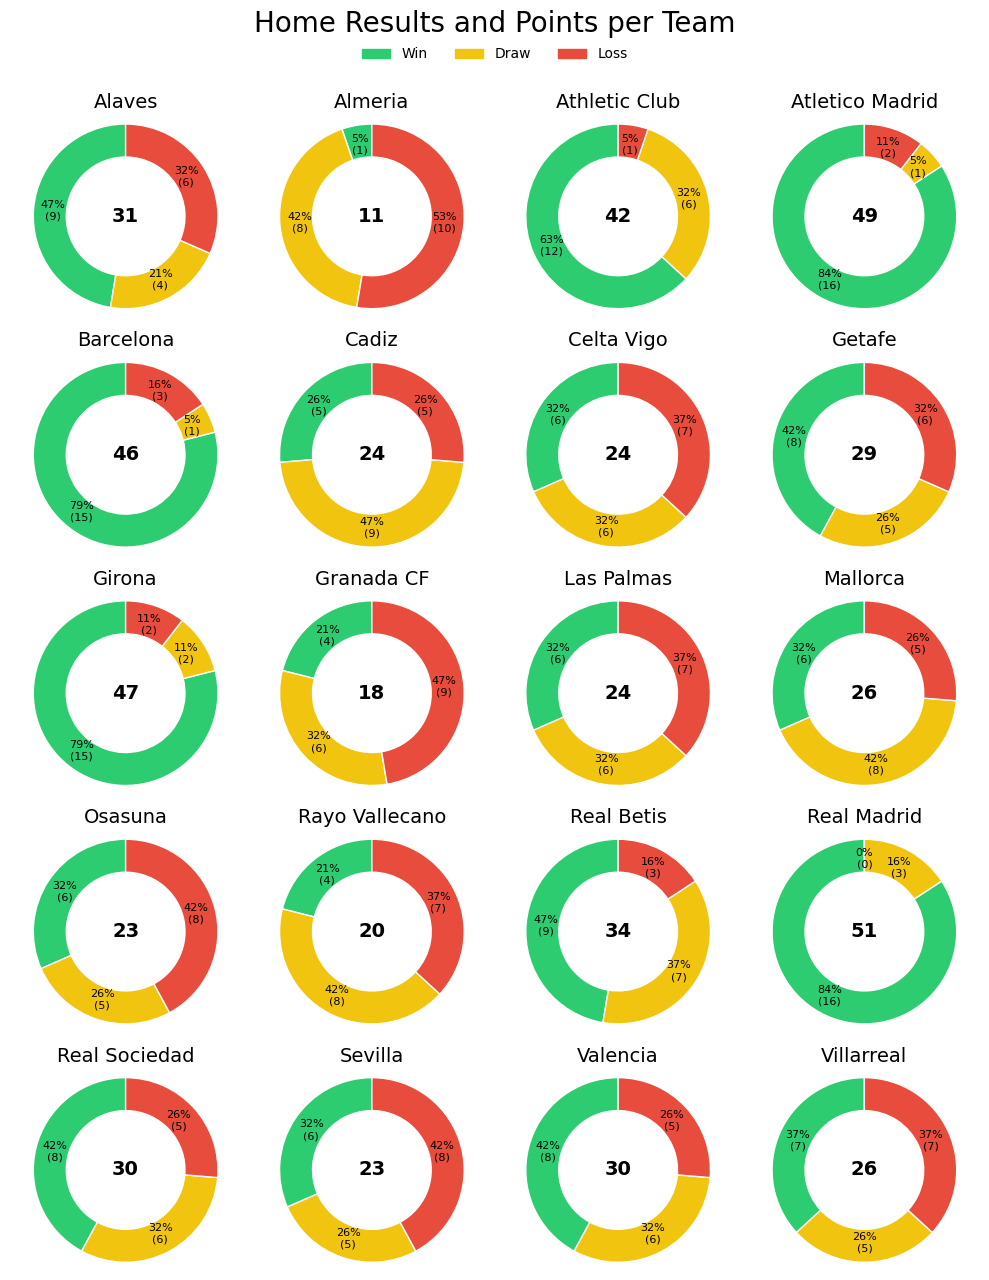

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np


# Cálculo de V/E/D por equipo en casa
home = df_fixtures.groupby('teams.home.name')['teams.home.winner'] \
         .value_counts().unstack().fillna(0)
home.columns = ['Loss','Win']  # Atención: true/false → Victoria o Pérdida
home['Draw'] = df_fixtures[df_fixtures['teams.home.winner'].isnull()] \
               .groupby('teams.home.name').size()
home = home.fillna(0)  
home = home[['Win','Draw','Loss']].reset_index()

# --- Parámetros de diseño ---
teams = sorted(home['teams.home.name'].unique())
teams_per_row = 4
n_rows = int(np.ceil(len(teams) / teams_per_row))

fig, axes = plt.subplots(n_rows, teams_per_row, figsize=(teams_per_row * 2.5, n_rows * 2.5))
axes = axes.flatten()

# --- Bucle para cada equipo ---
for idx, row in home.iterrows():
    ax = axes[idx]
    team = row['teams.home.name']
    values = [row['Win'], row['Draw'], row['Loss']]
    total = sum(values)
    labels = ['Win', 'Draw', 'Loss']
    colors = {'Win': '#2ecc71', 'Draw': '#f1c40f', 'Loss': '#e74c3c'}

    wedges, texts = ax.pie(
        values,
        startangle=90,
        colors=[colors[l] for l in labels],
        wedgeprops={'width': 0.25, 'edgecolor': 'white'},
        radius=0.7
    )

    # Añadir etiquetas con % y valor absoluto
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = 0.55 * np.cos(np.deg2rad(angle))
        y = 0.55 * np.sin(np.deg2rad(angle))
        pct = values[i] / total * 100
        ax.text(x, y, f"{pct:.0f}%\n({int(values[i])})", ha='center', va='center', fontsize=8, color='black')

    # Calcular puntos (3 por victoria + 1 por empate)
    points = int(row['Win'] * 3 + row['Draw'] * 1)
    ax.text(0, 0, f"{points}", ha='center', va='center', fontsize=14, weight='bold', color='black')

    ax.set_title(team, fontsize=14)
    ax.axis('equal')

# Ocultar subgráficos vacíos si los hay
for j in range(len(teams), len(axes)):
    fig.delaxes(axes[j])

legend_patches = [mpatches.Patch(color=colors[l], label=l) for l in labels]
fig.legend(handles=legend_patches,
           loc='upper center',
           ncol=3,
           frameon=False,
           fontsize=10,
           bbox_to_anchor=(0.5, 1))

plt.suptitle("Home Results and Points per Team", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


##### Goles Marcados vs Encajados por Equipo

El siguiente bloque de código combina los goles marcados y recibidos por cada equipo, tanto en casa como fuera.
Luego genera un gráfico de barras agrupadas que compara los goles anotados frente a los goles encajados por equipo.
En el tooltip se muestra también el rival correspondiente de cada partido.


In [23]:
# Prepara df goles marcados/encajados
home = df_fixtures[['teams.home.name','goals.home','goals.away', 'teams.away.name']].copy()
home.columns = ['team','scored','conceded', 'opponent']
away = df_fixtures[['teams.away.name','goals.away','goals.home', 'teams.home.name']].copy()
away.columns = ['team','scored','conceded', 'opponent']
goals = pd.concat([home, away])

fig = px.bar(goals, x='team', y=['scored','conceded'],
             barmode='group',
             hover_data=['opponent'],
             title="Goals Scored vs Conceded per Team")

fig.show()


#### Puntos Acumulados por Equipo a lo Largo del Tiempo

Este bloque de código calcula los puntos obtenidos por cada equipo en cada jornada (3 por victoria, 1 por empate, 0 por derrota).
Luego acumula los puntos a lo largo del tiempo y genera un gráfico de líneas que muestra la evolución de los puntos por equipo durante la temporada.


In [24]:
# Calcula los puntos por partido
def points(row, side):
    if row[f'teams.{side}.winner'] == True: return 3
    if row[f'teams.{side}.winner'] == False: return 0
    return 1

# Combinar y ordenar por fecha
home = df_fixtures[['fixture.date','teams.home.name']].copy()
home['points'] = df_fixtures.apply(lambda r: points(r,'home'), axis=1)
home.columns = ['date','team','points']
away = df_fixtures[['fixture.date','teams.away.name']].copy()
away['points'] = df_fixtures.apply(lambda r: points(r,'away'), axis=1)
away.columns = ['date','team','points']

points_df = pd.concat([home,away]).sort_values('date')
points_df['cum_points'] = points_df.groupby('team')['points'].cumsum()

fig = px.line(points_df, x='date', y='cum_points', color='team',
              title="Cumulative Points per Team over Time")
fig.show()


#### Porcentaje de Victorias en Casa vs Fuera de Casa

Este código calcula el porcentaje de victorias en casa y como visitante para cada equipo.
Luego genera un diagrama de dispersión (scatter plot) donde cada punto representa un equipo, comparando su rendimiento en casa frente al rendimiento fuera de casa.


In [25]:
# Calcula el porcentaje de victorias en casa y fuera de casa.
home_perf = df_fixtures.groupby('teams.home.name')['teams.home.winner'] \
              .sum().rename('home_win_pct') / (len(df_teams)-1)
away_perf = df_fixtures.groupby('teams.away.name')['teams.away.winner'] \
              .sum().rename('away_win_pct') / (len(df_teams)-1)
perf = pd.concat([home_perf, away_perf], axis=1).reset_index()

fig = px.scatter(perf, x='home_win_pct', y='away_win_pct', text='index',
                 title="Home vs Away Win %", labels={
                     'home_win_pct':'Home Win %',
                     'away_win_pct':'Away Win %'
                 })
fig.update_traces(textposition='top center')
fig.show()


#### Victorias por Día de la Semana (Local vs Visitante)

Se calcula cuántas victorias en casa y fuera de casa ocurren en cada día de la semana.
Luego se genera un gráfico de barras agrupadas para comparar la distribución de victorias según el día y la condición (local o visitante).


In [26]:
df_fixtures['weekday'] = pd.to_datetime(df_fixtures['fixture.date']).dt.day_name()
home_w = df_fixtures[df_fixtures['teams.home.winner'] == True].groupby('weekday').size()
away_w = df_fixtures[df_fixtures['teams.away.winner'] == True].groupby('weekday').size()
win_df = pd.concat([home_w, away_w], axis=1).fillna(0)
win_df.columns = ['home_wins', 'away_wins']

win_df = win_df.reset_index().melt(id_vars='weekday', var_name='result', value_name='wins')



fig = px.bar(
    win_df, x='weekday', y='wins', color='result', barmode='group',
    category_orders={'weekday': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']},
    title="Wins per Weekday (Home vs Away)",
    text='wins'  
)

fig.update_traces(textposition='outside') 

fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_title="Number of Wins",
    xaxis_title="Weekday"
)

fig.show()